In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#importing data
df = pd.read_csv('country_profile_variables.csv')
#editing column headings to make it easier work with
df.columns= df.columns.str.replace('(','',regex=True)
df.columns= df.columns.str.replace(')','',regex=True)
df.columns= df.columns.str.replace(',','',regex=True)
df.columns= df.columns.str.replace('%','',regex=True)
df.columns= df.columns.str.replace('.','',regex=True)
df.columns= df.columns.str.replace('$','D',regex=True)
df.columns= df.columns.str.replace(' ','_',regex=True)
print(df.head())

          country          Region Surface_area_km2  \
0     Afghanistan    SouthernAsia           652864   
1         Albania  SouthernEurope            28748   
2         Algeria  NorthernAfrica          2381741   
3  American Samoa       Polynesia              199   
4         Andorra  SouthernEurope              468   

   Population_in_thousands_2017  Population_density_per_km2_2017  \
0                         35530                             54.4   
1                          2930                            106.9   
2                         41318                             17.3   
3                            56                            278.2   
4                            77                            163.8   

   Sex_ratio_m_per_100_f_2017  \
0                       106.3   
1                       101.9   
2                       102.0   
3                       103.6   
4                       102.3   

   GDP:_Gross_domestic_product_million_current_USD  \
0            

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   country                                                 229 non-null    object 
 1   Region                                                  229 non-null    object 
 2   Surface_area_km2                                        229 non-null    object 
 3   Population_in_thousands_2017                            229 non-null    int64  
 4   Population_density_per_km2_2017                         229 non-null    float64
 5   Sex_ratio_m_per_100_f_2017                              229 non-null    float64
 6   GDP:_Gross_domestic_product_million_current_USD         229 non-null    int64  
 7   GDP_growth_rate_annual__const_2005_prices               229 non-null    object 
 8   GDP_per_capita_current_USD              

In [4]:
def max_lens(df):
    lens = []
    for x in df.columns:
        sublen = []
        for i, row, in df.iterrows():
            sublen.append(len(str(row[x])))
        lens.append(max(sublen))
    return lens

In [5]:
max_lens(df)

[41,
 17,
 8,
 7,
 7,
 5,
 8,
 5,
 8,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 9,
 3,
 3,
 7,
 7,
 7,
 7,
 5,
 5,
 4,
 3,
 9,
 9,
 12,
 6,
 4,
 5,
 4,
 4,
 11,
 11,
 11,
 5,
 5,
 4,
 4,
 4,
 11,
 6,
 3,
 11,
 11,
 5,
 3]

In [6]:
df.index

RangeIndex(start=0, stop=229, step=1)

In [7]:
df.set_index('country').head(10)

,Region,Surface_area_km2,Population_in_thousands_2017,Population_density_per_km2_2017,Sex_ratio_m_per_100_f_2017,GDP:_Gross_domestic_product_million_current_USD,GDP_growth_rate_annual__const_2005_prices,GDP_per_capita_current_USD,Economy:_Agriculture__of_GVA,Economy:_Industry__of_GVA,...,Mobile-cellular_subscriptions_per_100_inhabitants1,Individuals_using_the_Internet_per_100_inhabitants,Threatened_species_number,Forested_area__of_land_area,CO2_emission_estimates_million_tons/tons_per_capita,Energy_production_primary_Petajoules,Energy_supply_per_capita_Gigajoules,Pop_using_improved_drinking_water_urban/rural_,Pop_using_improved_sanitation_facilities_urban/rural_,Net_Official_Development_Assist_received__of_GNI
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3.0,4714.1,6.8,51.2,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99
Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,15.7,...,76.0,52,61.1,0.1/9.8,0,136,94.6/...,97.9/...,-99,-99
Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,18.3,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,...,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99


In [8]:
#indexing by location
df.iloc[[0,10,99], [0,1,2,3,8]]

,country,Region,Surface_area_km2,Population_in_thousands_2017,GDP_per_capita_current_USD
0,Afghanistan,SouthernAsia,652864,35530,623.2
10,Aruba,Caribbean,180,105,26005.4
99,Ireland,NorthernEurope,69797,4762,60513.6


In [9]:
#countries with a GDP per capita greater than $50 000
df[df['GDP_per_capita_current_USD'] > 50000]

,country,Region,Surface_area_km2,Population_in_thousands_2017,Population_density_per_km2_2017,Sex_ratio_m_per_100_f_2017,GDP:_Gross_domestic_product_million_current_USD,GDP_growth_rate_annual__const_2005_prices,GDP_per_capita_current_USD,Economy:_Agriculture__of_GVA,...,Mobile-cellular_subscriptions_per_100_inhabitants1,Individuals_using_the_Internet_per_100_inhabitants,Threatened_species_number,Forested_area__of_land_area,CO2_emission_estimates_million_tons/tons_per_capita,Energy_production_primary_Petajoules,Energy_supply_per_capita_Gigajoules,Pop_using_improved_drinking_water_urban/rural_,Pop_using_improved_sanitation_facilities_urban/rural_,Net_Official_Development_Assist_received__of_GNI
11,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,2.5,...,84.6,948,16.2,361.3/15.3,15282,222,100.0/100.0,100.0/100.0,-99,-99
22,Bermuda,NorthernAmerica,53,61,1227.0,91.4,5853,0.4,94399.9,0.7,...,98.3,72,20.0,0.6/9.2,1,136,-99,-99,-99,-99
38,Cayman Islands,Caribbean,264,62,256.5,100.4,3726,0.7,62132.0,0.3,...,77.0,74,52.9,0.5/9.2,-99,130,97.4/...,95.6/...,-99,-99
44,"China, Macao SAR",EasternAsia,30,623,20821.6,92.3,46178,-20.3,78586.4,-99,...,77.6,11,-99,1.3/2.2,2,62,-99,-99,-99,-99
57,Denmark,NorthernEurope,42921,5734,135.1,99.0,301308,1.6,53149.3,1.2,...,96.3,47,14.4,33.5/5.9,666,119,100.0/100.0,99.6/99.6,-99,-99
94,Iceland,NorthernEurope,103000,335,3.3,100.7,16780,4.2,50936.0,6.4,...,98.2,27,0.5,2.0/6.1,284,952,100.0/100.0,98.7/100.0,-99,-99
99,Ireland,NorthernEurope,69797,4762,69.1,98.4,283716,26.3,60513.6,1.0,...,80.1,50,10.9,34.1/7.3,84,114,97.9/97.8,89.1/92.9,-99,-99
117,Liechtenstein,WesternEurope,160,38,237.0,98.4,6361,1.4,169491.8,0.7,...,96.6,6,43.1,~0.0/1.1,1,74,-99,-99,-99,-99
119,Luxembourg,WesternEurope,2586,584,225.3,101.0,56802,3.5,100160.8,0.2,...,97.3,11,33.5,9.7/17.3,6,290,100.0/100.0,97.5/98.5,-99,-99
133,Monaco,WesternEurope,2,39,25969.8,94.7,6258,5.4,165870.6,-99,...,93.4,21,-99,-99,-99,-99,100.0/...,100.0/...,-99,-99


In [10]:
# Load the data into a pandas dataframe using API
from bs4 import BeautifulSoup as bs
import requests
APIdata = requests.get('https://www.worldometers.info/gdp/gdp-by-country/')
nominal = bs(APIdata.content, 'lxml')
table = nominal.find("table", {"class":"table"})
pd.read_html(str(table))[0]

,#,Country,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756,"$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,127502725,"$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,82658409,"$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,1338676785,"$1,980",3.28%
...,...,...,...,...,...,...,...,...
185,186,Micronesia,"$336,427,500",$336 million,3.20%,532899,$631,0.00%
186,187,Palau,"$289,823,500",$290 million,-3.57%,17808,"$16,275",0.00%
187,188,Marshall Islands,"$204,173,430",$204 million,3.60%,58058,"$3,517",0.00%
188,189,Kiribati,"$185,572,502",$186 million,0.33%,114158,"$1,626",0.00%


In [11]:
df = df[df['GDP:_Gross_domestic_product_million_current_USD'] > 0.0] #the data set fills any missing values with a value of -99
#grouping countries by region
x = df.groupby('Region')['GDP:_Gross_domestic_product_million_current_USD'].sum()
print(x)

Region
Caribbean              334702
CentralAmerica        1370237
CentralAsia            302780
EasternAfrica          306369
EasternAsia          17302861
EasternEurope         2575829
Melanesia               36455
Micronesia               1107
MiddleAfrica           231956
NorthernAfrica         736257
NorthernAmerica      19597387
NorthernEurope        4664905
Oceania               1404276
Polynesia                6638
South-easternAsia     2440849
SouthAmerica          3695061
SouthernAfrica         346594
SouthernAsia          3104479
SouthernEurope        3593118
WesternAfrica          613199
WesternAsia           2840231
WesternEurope         8105149
Name: GDP:_Gross_domestic_product_million_current_USD, dtype: int64


<BarContainer object of 22 artists>

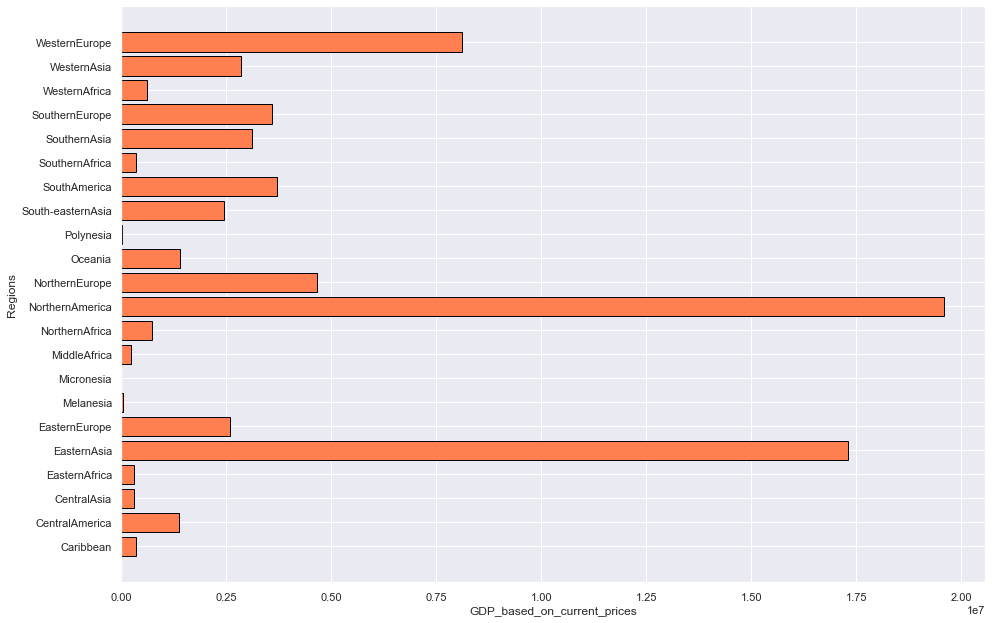

In [23]:
#figure plotting each major regions total GDP

fig = plt.figure()
Regions = []
for i in df['Region'].unique():
    Regions.append(i)
ax = fig.add_axes([0,0,2,2])
plt.ylabel("Regions")
plt.xlabel("GDP_based_on_current_prices")
ax.barh(sorted(Regions),x , color ='coral', edgecolor = 'black')

In [13]:
dict = {'Regions' : df['Region'] , 'GDP' :df['GDP:_Gross_domestic_product_million_current_USD'] , 'country': df['country']}
df1 = pd.DataFrame(data = dict)
df1.head()

,Regions,GDP,country
0,SouthernAsia,20270,Afghanistan
1,SouthernEurope,11541,Albania
2,NorthernAfrica,164779,Algeria
4,SouthernEurope,2812,Andorra
5,MiddleAfrica,117955,Angola


<AxesSubplot:ylabel='Percentage'>

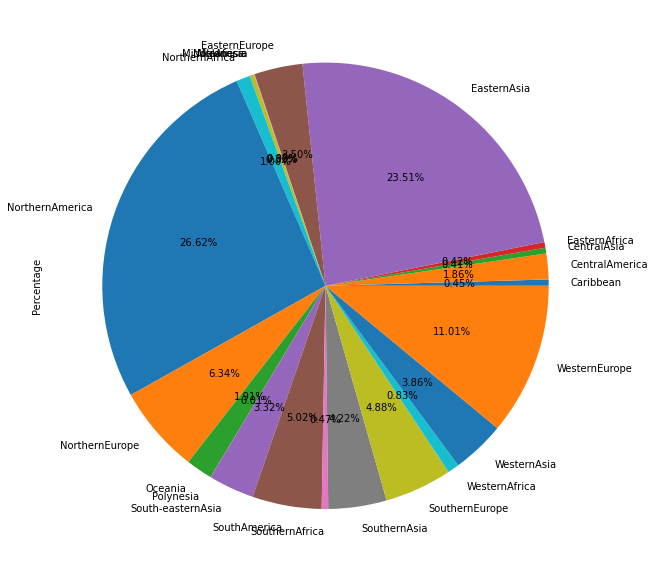

In [14]:
#pie chart showing each regions percentage of global GDP

pie = df1.groupby('Regions')['GDP'].sum().round().reset_index()
pie["Percentage"] = (pie.GDP/sum(pie.GDP))*100
pie = pie.drop(columns = ["GDP"])
pie
pie.plot(kind = "pie",y="Percentage",labels=pie['Regions'],legend=False,figsize=(10,50),autopct="%.2f%%" )

In [15]:
df3 = df[df['Population_in_thousands_2017'] > 60000]
df3

,country,Region,Surface_area_km2,Population_in_thousands_2017,Population_density_per_km2_2017,Sex_ratio_m_per_100_f_2017,GDP:_Gross_domestic_product_million_current_USD,GDP_growth_rate_annual__const_2005_prices,GDP_per_capita_current_USD,Economy:_Agriculture__of_GVA,...,Mobile-cellular_subscriptions_per_100_inhabitants1,Individuals_using_the_Internet_per_100_inhabitants,Threatened_species_number,Forested_area__of_land_area,CO2_emission_estimates_million_tons/tons_per_capita,Energy_production_primary_Petajoules,Energy_supply_per_capita_Gigajoules,Pop_using_improved_drinking_water_urban/rural_,Pop_using_improved_sanitation_facilities_urban/rural_,Net_Official_Development_Assist_received__of_GNI
16,Bangladesh,SouthernAsia,147570,164670,1265.0,101.7,194466,6.6,1207.9,15.5,...,14.4,151,11.0,73.2/0.5,1438,11,86.5/87.0,57.7/62.1,1.24,-99
28,Brazil,SouthAmerica,8515767,209288,25.0,96.6,1772591,-3.8,8528.3,5.2,...,59.1,990,59.2,529.8/2.6,10948,61,100.0/87.0,88.0/51.5,0.06,-99
45,China,EasternAsia,9600000,1409517,150.1,106.3,11158457,6.9,8109.1,9.2,...,50.3,1080,22.0,10291.9/7.5,101394,87,97.5/93.0,86.6/63.7,0.00,-99
56,Democratic Republic of the Congo,MiddleAfrica,2344858,81340,35.9,99.6,37569,7.0,486.2,19.9,...,3.8,349,67.4,4.7/0.1,1179,16,81.1/31.2,28.5/28.7,8.01,-99
62,Egypt,NorthernAfrica,1002000,97553,98.0,102.3,315917,4.2,3452.3,11.2,...,35.9,156,0.1,201.9/2.2,3509,36,100.0/99.0,96.8/93.1,0.78,-99
67,Ethiopia,EasternAfrica,1104300,104957,105.0,99.7,59917,9.6,602.8,40.5,...,11.6,148,12.5,11.6/0.1,1308,15,93.1/48.6,27.2/28.2,5.28,-99
72,France,WesternEurope,551500,64980,118.7,96.7,2418946,1.3,36304.2,1.7,...,84.7,278,30.8,303.3/4.7,5694,158,100.0/100.0,98.6/98.9,-99,-99
78,Germany,WesternEurope,357376,82114,235.6,97.0,3363600,1.7,41686.2,0.6,...,87.6,116,32.7,719.9/8.9,5004,158,100.0/100.0,99.3/99.0,-99,-99
95,India,SouthernAsia,3287263,1339180,450.4,107.6,2116239,7.6,1614.2,17.0,...,26.0,1052,23.7,2238.4/1.7,23103,27,97.1/92.6,62.6/28.5,0.16,-99
96,Indonesia,South-easternAsia,1910931,263991,145.7,101.4,861934,4.8,3346.5,14.0,...,22.0,1281,50.6,464.2/1.8,19481,35,94.2/79.5,72.3/47.5,0.00,-99


In [16]:
#indexing the necessary columns for the next step
urban = df.loc[:,["country","Region","GDP_per_capita_current_USD","Urban_population__of_total_population", "Population_in_thousands_2017"]]
urban

,country,Region,GDP_per_capita_current_USD,Urban_population__of_total_population,Population_in_thousands_2017
0,Afghanistan,SouthernAsia,623.2,26.7,35530
1,Albania,SouthernEurope,3984.2,57.4,2930
2,Algeria,NorthernAfrica,4154.1,70.7,41318
4,Andorra,SouthernEurope,39896.4,85.1,77
5,Angola,MiddleAfrica,4714.1,44.1,29784
...,...,...,...,...,...
222,Venezuela (Bolivarian Republic of),SouthAmerica,11068.9,89.0,31977
223,Viet Nam,South-easternAsia,2067.9,33.6,95541
226,Yemen,WesternAsia,1106.4,34.6,28250
227,Zambia,EasternAfrica,1311.1,40.9,17094


<AxesSubplot:xlabel='GDP_per_capita_current_USD', ylabel='Urban_population__of_total_population'>

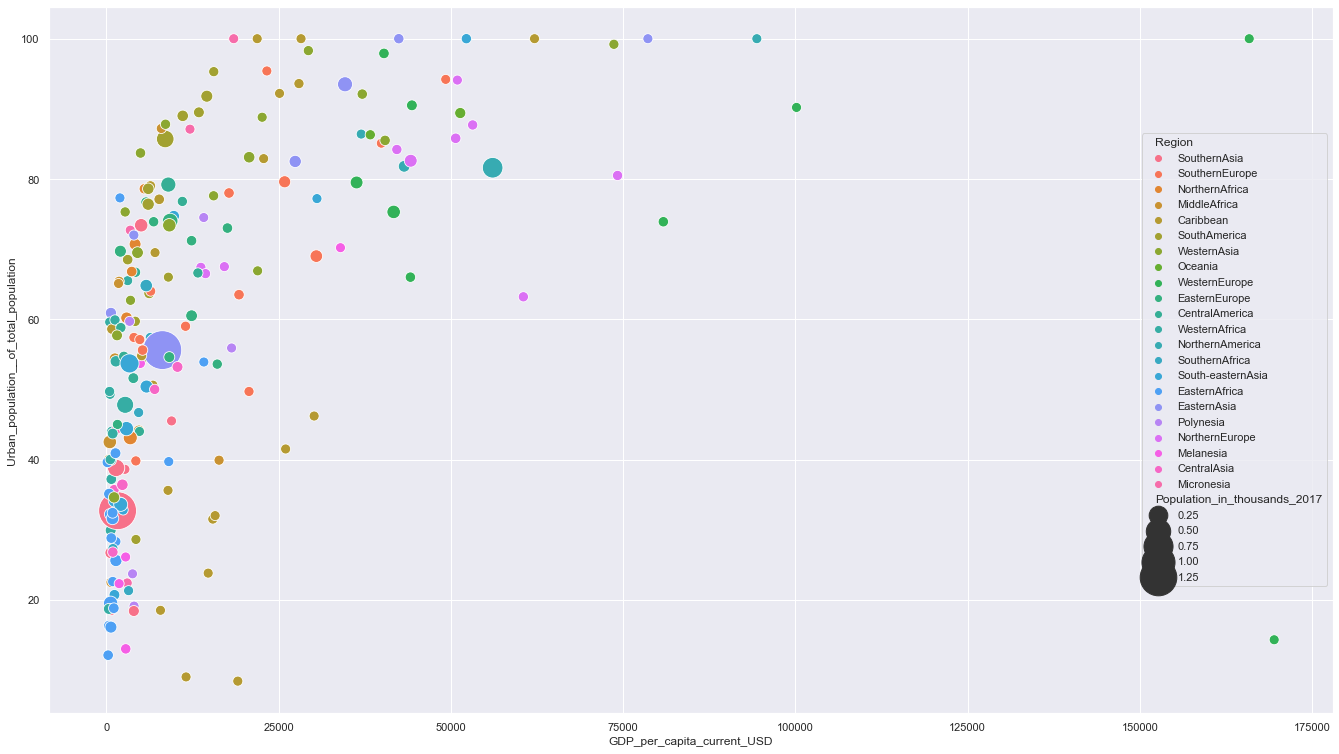

In [25]:
sns.set() 
fig = plt.gcf()
pop = urban["Population_in_thousands_2017"]
# Change seaborn plot size
fig.set_size_inches(23, 13)
sns.scatterplot(x="GDP_per_capita_current_USD",
                    y="Urban_population__of_total_population",
                    hue="Region", size=pop , sizes=(100,1500),
                    data=urban)

In [18]:
#indexing rows that are located in Europe
# Set index on a Dataframe
urban.set_index("Region",
            inplace = True)
# to select multiple rows
urban1 = urban.loc[["WesternEurope", "EasternEurope", "NorthernEurope", "SouthernEurope"]]
urban1
#reset index
urban = urban.reset_index()
urban1 = urban1.reset_index()

<AxesSubplot:xlabel='GDP_per_capita_current_USD', ylabel='Urban_population__of_total_population'>

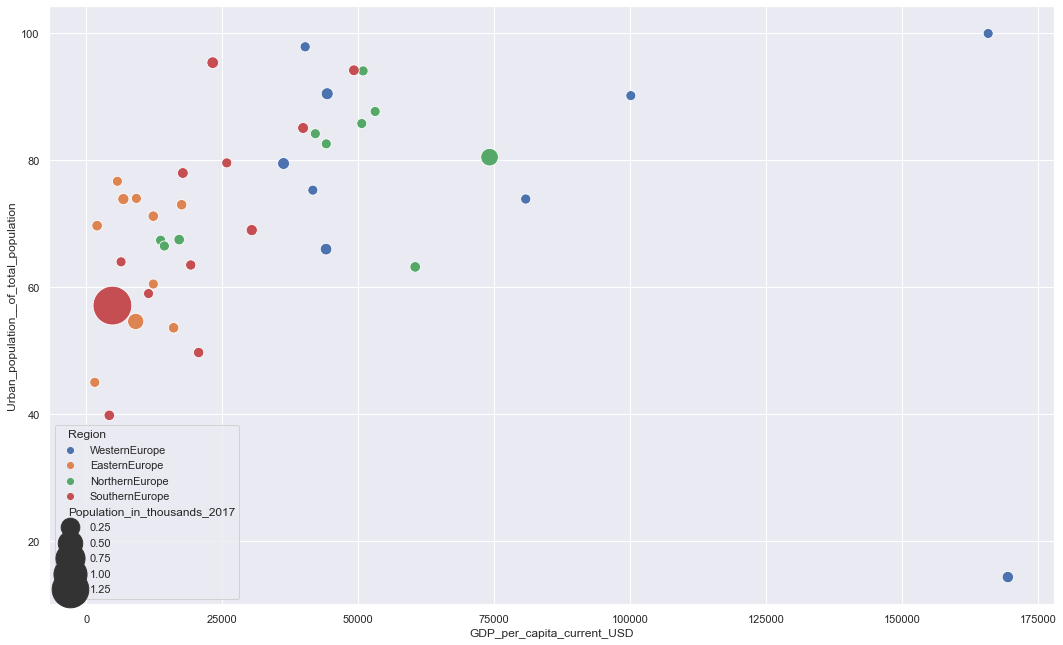

In [27]:
sns.set() 
fig = plt.gcf()
pop = urban["Population_in_thousands_2017"]
# Change seaborn plot size
fig.set_size_inches(18, 11)
sns.scatterplot(x="GDP_per_capita_current_USD",
                    y="Urban_population__of_total_population",
                    hue="Region", size=pop , sizes=(100,1500),
                    data=urban1)

In [26]:
urban1

,Region,country,GDP_per_capita_current_USD,Urban_population__of_total_population,Population_in_thousands_2017
0,WesternEurope,Austria,44117.7,66.0,8736
1,WesternEurope,Belgium,40277.8,97.9,11429
2,WesternEurope,France,36304.2,79.5,64980
3,WesternEurope,Germany,41686.2,75.3,82114
4,WesternEurope,Liechtenstein,169491.8,14.3,38
5,WesternEurope,Luxembourg,100160.8,90.2,584
6,WesternEurope,Monaco,165870.6,100.0,39
7,WesternEurope,Netherlands,44332.1,90.5,17036
8,WesternEurope,Switzerland,80831.1,73.9,8476
9,EasternEurope,Belarus,5750.8,76.7,9468
